<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1">
       <span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li>
    <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
        <span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3">
        <span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li>
    <li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4">
        <span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span></li>
    <li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5">
        <span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li>
    <li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6">
        <span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li>
    <li><span><a href="#Вывод" data-toc-modified-id="Вывод-7">
        <span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li>
</ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель исследования** — построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. 

**Ход исследования**
1. Изучение файла
2. Предобработка данных
3. Подготовка данных
4. Исследование задачи
5. Борьба с дисбалансом
6. Тестирование модели
7. Вывод

Дополнительно необходимо измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Изучение общей информации

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

### Открытие файла

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv', sep=',', engine='python')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv', sep=',', engine='python')

### Вывод первых десяти строк таблицы

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Вывод основной информации о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Вывод

Согласно документации к данным:
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата
* `Exited` — факт ухода клиента

Целевым признаком будет являться `Exited`. Остальные столбцы, кроме `RowNumber`, `CustomerId` и `Surname`, будут являться признаками.

Необходимо провести предобработку данных, так как в столбце `Tenure` были замечены пропуски, изменить типы данных на более подходящие, а также изменить названия столбцов таким образом, чтобы все символы в них были строчными, и сами названия были в змеином регистре, а затем перейти к подготовке данных.

## Предобработка данных

### Изменение названий столбцов датафрейма

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Приведем все буквы в названиях столбцов к строчным:

In [6]:
data.columns = [column.lower() for column in data.columns]

Затем перепишем названия в змеином регистре:

In [7]:
data = data.rename(columns={'rownumber' : 'row_number', 
                        'customerid' : 'customer_id', 
                        'creditscore' : 'credit_score', 
                        'numofproducts' : 'num_of_products',
                        'hascrcard' : 'has_cr_card',
                        'isactivemember' : 'is_active_member', 
                        'estimatedsalary' : 'estimated_salary'})

In [8]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Заполнение пропусков

Так как заполнить пропуск количества лет, которые человек является клиентом банка, невозможно, не навредив данным, заполним пропуски рандомно от минимума до максимума из таблицы `tenure`.

In [10]:
data['tenure'] = data['tenure'].fillna(random.randint(data['tenure'].min(), data['tenure'].max()))

### Изменение типов данных

In [11]:
data['tenure'] = data['tenure'].astype('int')

### Вывод

Предобработка обнаружила две проблемы в данных:

- пропущенные значения,
- неверные типи данных,
- стиль заголовков.

Теперь можно перейти к подготовке данных.

## Подготовка данных

### Разбиение данных на целевой признак и признаки

In [12]:
features = data.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)
target = data['exited']

### Разбиение данных на выборки

In [15]:
features_train, features_sep, target_train, target_sep = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_sep, target_sep, test_size=0.5, random_state=12345)

In [16]:
features_train.shape #обучающая выборка

(6000, 10)

In [17]:
features_valid.shape #валидационная выборка

(2000, 10)

In [18]:
features_test.shape #тестовая выборка

(2000, 10)

In [19]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

### Масштабирование признаков

In [20]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод

На этапе подготовки данные были разделены на тренировочную, валидационную и тестовую в отношении 3:1:1: в тренировочной выборке 6000 объектов, а в валидационной и тестовой по 2000 объекта. Также понадобилось преобразовать категориальные признаки в численные и промасштабировать численные признаки.

## Исследование задачи

Проверим, есть ли в классах дисбаланс по количеству объектов:

In [21]:
target_ones = target_train[target_train == 1]
target_zeros = target_train[target_train == 0]

print('Количество объектов, принадлежащих классу 1:', target_ones.shape[0])
print('Количество объектов, принадлежащих классу 0:', target_zeros.shape[0])

Количество объектов, принадлежащих классу 1: 1196
Количество объектов, принадлежащих классу 0: 4804


Действительно, оказалось, что объектов, принадлежащих классу 1 намного меньше, чем объектов, принадлежащих классу 0 в обучающей выборке. Виден явный дисбаланс классов в пользу отрицательного класса. Если мы будем всех людей прогнозировать, что они не уйдут из банка, то в 80% случаев мы будем правы.

### Изучение моделей без учета дисбаланса

In [22]:
model = LogisticRegression(solver='liblinear', random_state=12345).fit(
    features_train, target_train)
predictions_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.33108108108108103
AUC-ROC: 0.7587512627102753


Метрика F1 для модели логистической регрессии оказалась достаточно мала, а AUC-ROC показывает неплохой результат, следовательно, класс 1 определяется хуже, чем класс 0.

In [23]:
model = DecisionTreeClassifier(random_state=12345).fit(
    features_train, target_train)
predictions_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5006045949214026
AUC-ROC: 0.6837644190927842


Для дерева решений метрика F1 оказалась больше, чем для логистической регрессии, но этого значения все еще недостаточно. К тому же метрика AUC-ROC показывает, что данная модель меньше отличается от случайной, чем предыдущая.

In [24]:
for est in range(10, 100, 10):
    model = RandomForestClassifier(n_estimators=est, random_state=12345).fit(
        features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    print('Количество деревьев: ', est, '| F1:', f1_score(target_valid, predictions_valid),
         '| AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

Количество деревьев:  10 | F1: 0.5522388059701492 | AUC-ROC: 0.8152246565730497
Количество деревьев:  20 | F1: 0.5481927710843373 | AUC-ROC: 0.8319945075883594
Количество деревьев:  30 | F1: 0.5714285714285715 | AUC-ROC: 0.8331861431535394
Количество деревьев:  40 | F1: 0.5632530120481928 | AUC-ROC: 0.8342991428692407
Количество деревьев:  50 | F1: 0.5718562874251497 | AUC-ROC: 0.8367618059630169
Количество деревьев:  60 | F1: 0.575712143928036 | AUC-ROC: 0.8393371300334506
Количество деревьев:  70 | F1: 0.5799701046337816 | AUC-ROC: 0.8379640271233193
Количество деревьев:  80 | F1: 0.5787106446776611 | AUC-ROC: 0.8401900265547215
Количество деревьев:  90 | F1: 0.5812220566318926 | AUC-ROC: 0.8415563244394171


Случайный лес имеет лучшие показатели и по F1, и по AUC-ROC. Возможно, их можно еще повысить с помощью баланса классов.

### Вывод

Изучив логистическую регрессию, дерево решений и случайный лес по метрикам F1 и AUC-ROC, можно сказать, что лучшая модель по показателям - это случайный лес. Данная модель имеет высокие показатели, которые еще возможно повысить.

## Борьба с дисбалансом

### Увеличение выборки

Так как объектов класса 1 меньше, чем объектов класса 0, то нужно увеличить количество объектов, принадлежащих классу 1 для баланса:

In [25]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

features_train_up = pd.concat([features_zeros] + [features_ones] * 4)
target_train_up = pd.concat([target_zeros] + [target_ones] * 4)
    
features_train_up, target_train_up = shuffle(features_train_up, target_train_up, random_state=12345)

In [26]:
target_ones = target_train[target_train == 1]
target_zeros = target_train[target_train == 0]

print('Количество объектов, принадлежащих классу 1:', target_ones.shape[0])
print('Количество объектов, принадлежащих классу 0:', target_zeros.shape[0])

Количество объектов, принадлежащих классу 1: 1196
Количество объектов, принадлежащих классу 0: 4804


### Выбор лучшей модели при увеличенной выборке

Исходя из пункта 4, необходимо взять модель случайного леса и перебрать возможные количества деревьев для определения лучшей модели по метрикам F1 и AUC-ROC.

In [27]:
best_model_forest1 = None
best_result_forest1 = 0
best_est1 = 0
best_auc_roc1= 0

for est in range(10, 100, 10):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_train_up, target_train_up) 
    predictions_valid = model_forest.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    result_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    print('Количество деревьев: ', est, '| F1:', result,
         '| AUC-ROC:', result_auc_roc)
    
    if result > best_result_forest1:
        best_model_forest1 = model_forest
        best_result_forest1 = result
        best_est1 = est
        best_auc_roc1 = result_auc_roc

print('F1 наилучшей модели случайного леса на валидационной выборке равно', best_result_forest1, 
      'AUC-ROC равно', best_auc_roc1, 
      'с количеством деревьев, равным', best_est1)

Количество деревьев:  10 | F1: 0.5822102425876011 | AUC-ROC: 0.8415563244394171
Количество деревьев:  20 | F1: 0.5959731543624162 | AUC-ROC: 0.8415563244394171
Количество деревьев:  30 | F1: 0.5997357992073975 | AUC-ROC: 0.8415563244394171
Количество деревьев:  40 | F1: 0.5970937912813739 | AUC-ROC: 0.8415563244394171
Количество деревьев:  50 | F1: 0.5992115637319316 | AUC-ROC: 0.8415563244394171
Количество деревьев:  60 | F1: 0.5976408912188729 | AUC-ROC: 0.8415563244394171
Количество деревьев:  70 | F1: 0.6085825747724317 | AUC-ROC: 0.8415563244394171
Количество деревьев:  80 | F1: 0.6026315789473685 | AUC-ROC: 0.8415563244394171
Количество деревьев:  90 | F1: 0.6105263157894737 | AUC-ROC: 0.8415563244394171
F1 наилучшей модели случайного леса на валидационной выборке равно 0.6105263157894737 AUC-ROC равно 0.8415563244394171 с количеством деревьев, равным 90


### Выбор лучшей модели при балансировке весов классов

In [28]:
best_model_forest2 = None
best_result_forest2 = 0
best_est2 = 0
best_auc_roc2= 0

for est in range(10, 100, 10):
    model_forest = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est)
    model_forest.fit(features_train, target_train) 
    predictions_valid = model_forest.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    result_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    print('Количество деревьев: ', est, '| F1:', result,
         '| AUC-ROC:', result_auc_roc)
    
    if result > best_result_forest2:
        best_model_forest2 = model_forest
        best_result_forest2 = result
        best_est2 = est
        best_auc_roc2 = result_auc_roc

print('F1 наилучшей модели случайного леса на валидационной выборке равно', best_result_forest2, 
      'AUC-ROC равно', best_auc_roc2, 
      'с количеством деревьев, равным', best_est2)

Количество деревьев:  10 | F1: 0.5304212168486739 | AUC-ROC: 0.8415563244394171
Количество деревьев:  20 | F1: 0.5421133231240429 | AUC-ROC: 0.8415563244394171
Количество деревьев:  30 | F1: 0.5362095531587057 | AUC-ROC: 0.8415563244394171
Количество деревьев:  40 | F1: 0.549079754601227 | AUC-ROC: 0.8415563244394171
Количество деревьев:  50 | F1: 0.5683890577507599 | AUC-ROC: 0.8415563244394171
Количество деревьев:  60 | F1: 0.5657492354740061 | AUC-ROC: 0.8415563244394171
Количество деревьев:  70 | F1: 0.5595054095826894 | AUC-ROC: 0.8415563244394171
Количество деревьев:  80 | F1: 0.5612403100775193 | AUC-ROC: 0.8415563244394171
Количество деревьев:  90 | F1: 0.5643410852713179 | AUC-ROC: 0.8415563244394171
F1 наилучшей модели случайного леса на валидационной выборке равно 0.5683890577507599 AUC-ROC равно 0.8415563244394171 с количеством деревьев, равным 50


### Вывод

Через перебор гиперпараметра случайного леса была найдена лучшая модель для обучающей увеличенной выборки и для обучающей выборки с балансировкой весов классов. Судя по значению метрики F1, модель для обучающей увеличенной выборки показала лучшие результаты.

## Тестирование модели

### Тестирование модели для увеличенной выборки

In [29]:
predictions_test = best_model_forest1.predict(features_test)

print("F1:", f1_score(target_test, predictions_test))

probabilities_test = best_model_forest1.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_test))

F1: 0.5911458333333333
AUC-ROC: 0.845083956580334


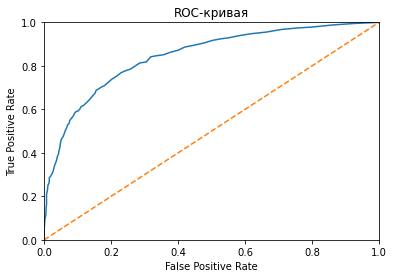

In [30]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

### Тестирование модели для балансированных весов классов

In [31]:
predictions_test = best_model_forest2.predict(features_test)

print("F1:", f1_score(target_test, predictions_test))

probabilities_test = best_model_forest2.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_test))

F1: 0.5194401244167963
AUC-ROC: 0.848089633637199


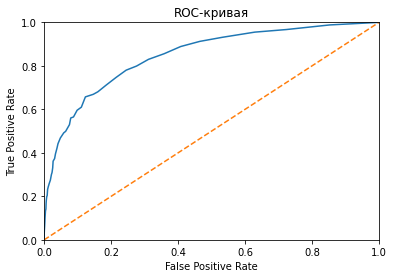

In [32]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

### Вывод

При тестировании модель случайного леса для увеличенной выборки выдает F1 равное требуемым 0.59, а также имеет высокий показатель AUC-ROC, равный 0.85. Модель хорошо определяет и класс 1, и класс 0.

Модель случайного леса для балансировки весов классов выдает F1 около 0.52, но имеет высокий показатель AUC-ROC. Следовательно, данная модель хуже определяет класс 1 и имеет показатель F1 ниже требуемых 0.59.

## Вывод

В представленных данных были обнаружены пропуски в столбце `tenure`, которые были заполнены рандомными значениями от минимума до максимума в значениях столбца, типы данных изменены на корректные, а также изменен некорректный стиль заголовков - названия столбцов были переписаны в змеином регистре, а буквы приведены к строчным. 

После предобработки данные были подготовлены для дальнейшей работы с моделями: они были разделены на целевой признак и признаки, а затем на обучающую, валидационную и тестовую выборки в отношении 3:1:1. Категориальные признаки были преобразованы в численные, а численные признаки были промасштабированы. 

В подготовленных данных был обнаружен дисбаланс: объектов класса 1 содержалось больше, чем объектов класса 0, в связи с чем было необходимо увеличить выборку таким образом, чтобы увеличилось количество объектов класса 1. При изучении моделей без учета дисбаланса лучшие показатели метрик F1 и AUC-ROC показала модель случайного леса.

Затем были рассмотрены две модели случайного леса: для увеличенной выборки и для балансированных весов классов. Модель для увеличенной выборки показала лучшие результаты: F1-мера достигла необходимых 0.59. Также модель способна определить и класс 1, и класс 0 с большой точностью - показатель AUC-ROC равен 0.85. 

Модель для балансированных весов классов имеет значение F1 ниже и равно 0.52, но так же, как и у предыдущей рассмотренной модели имеет высокое значение метрики AUC-ROC.